# Análisis Descriptivo y Exploratorio
## Carga del DS

1. **Describir la Población de Estudio**:
    - Edad, género y distribución geográfica de los pacientes.
    - Tipos de seguros predominantes.
2. **Describir los Valores de Hemoglobina**:
    - Distribución de los valores de hemoglobina al momento del diagnóstico.
    - Evolución de los valores de hemoglobina en los distintos seguimientos.
  

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('../datasets/Niños_menores_de_36_meses_con_dx_de_anemia_en_la_Región_ Junín_limpio.csv', encoding='utf-8', sep=',')

df.head()

,valor_lab_dx,hb_dx,hb_unmes,hb_tresmeses,hb_seismeses,recup,Red,MicroRed,Nombre_Establecimiento,Provincia,Distrito,num_sup,num_dos_seg,edad_diagnostico,tiempo_recup,seguro_0,seguro_1,seguro_2,seguro_3,seguro_4
0,0.0,12.6,NaN,NaN,NaN,0,VALLE DEL MANTARO,CHILCA,HUANCAN,HUANCAYO,HUANCAN,1,0,12.033333,NaN,0,1,0,0,0
1,0.0,13.7,NaN,NaN,NaN,0,JUNIN,CARHUAMAYO,CARHUAMAYO,JUNIN,CARHUAMAYO,0,0,13.000000,NaN,0,1,0,0,0
2,2.0,12.1,NaN,NaN,NaN,0,RED DE SALUD CHUPACA,CHUPACA,PEDRO SANCHEZ MEZA - CHUPACA,CHUPACA,CHUPACA,1,0,12.000000,NaN,0,1,0,0,0
3,0.0,12.1,NaN,NaN,NaN,0,VALLE DEL MANTARO,EL TAMBO,JUSTICIA PAZ Y VIDA,HUANCAYO,EL TAMBO,1,0,18.033333,NaN,0,1,0,0,0
4,1.0,9.8,NaN,NaN,NaN,0,SAN MARTIN DE PANGOA,CUBANTIA,MATERENI,SATIPO,PANGOA,1,0,12.000000,NaN,0,1,0,0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12453 entries, 0 to 12452
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   valor_lab_dx            12453 non-null  float64
 1   hb_dx                   12453 non-null  float64
 2   hb_unmes                7570 non-null   float64
 3   hb_tresmeses            6161 non-null   float64
 4   hb_seismeses            5366 non-null   float64
 5   recup                   12453 non-null  int64  
 6   Red                     12453 non-null  object 
 7   MicroRed                12453 non-null  object 
 8   Nombre_Establecimiento  12453 non-null  object 
 9   Provincia               12453 non-null  object 
 10  Distrito                12453 non-null  object 
 11  num_sup                 12453 non-null  int64  
 12  num_dos_seg             12453 non-null  int64  
 13  edad_diagnostico        12453 non-null  float64
 14  tiempo_recup            5849 non-null 

In [12]:
print(df.describe())

       valor_lab_dx         hb_dx     hb_unmes  hb_tresmeses  hb_seismeses  \
count  12453.000000  12453.000000  7570.000000   6161.000000   5366.000000   
mean       0.349313     11.028979    11.553379     11.841453     12.284883   
std        0.490226      1.158050     1.461732      1.477011      1.410090   
min        0.000000      8.500000     0.700000      5.800000      0.000000   
25%        0.000000     10.200000    10.500000     10.800000     11.200000   
50%        0.000000     10.800000    11.300000     11.600000     12.000000   
75%        1.000000     12.100000    12.800000     13.000000     13.400000   
max        2.000000     13.700000    18.100000     17.500000     19.000000   

              recup       num_sup   num_dos_seg  edad_diagnostico  \
count  12453.000000  12453.000000  12453.000000      12453.000000   
mean       0.469686      3.167590      1.533526         12.041227   
std        0.499100      1.815477      1.082942          5.700522   
min        0.000000  

In [13]:
print(df.describe(include=['object']))

                      Red MicroRed Nombre_Establecimiento Provincia   Distrito
count               12453    12453                  12453     12453      12453
unique                  9       41                    443         9        121
top     VALLE DEL MANTARO   CHILCA        CIUDAD SATELITE  HUANCAYO  RIO TAMBO
freq                 4687     1963                    425      4177       1217


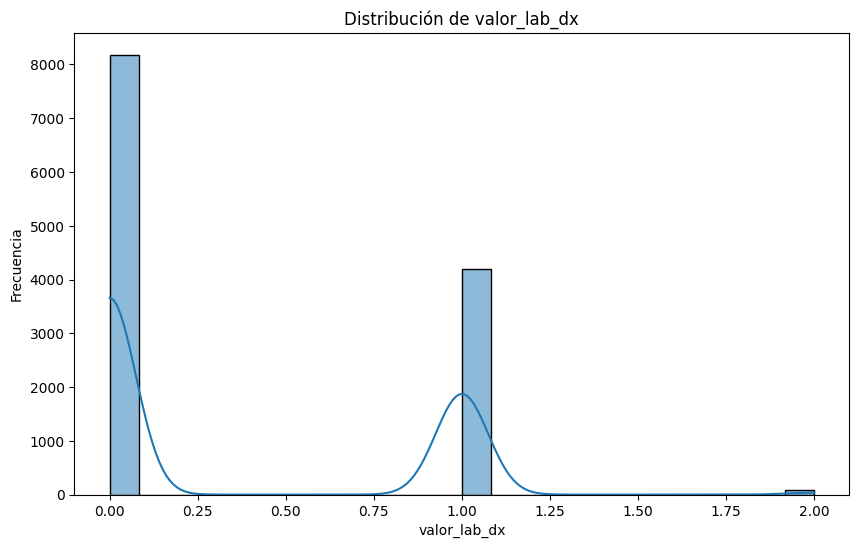

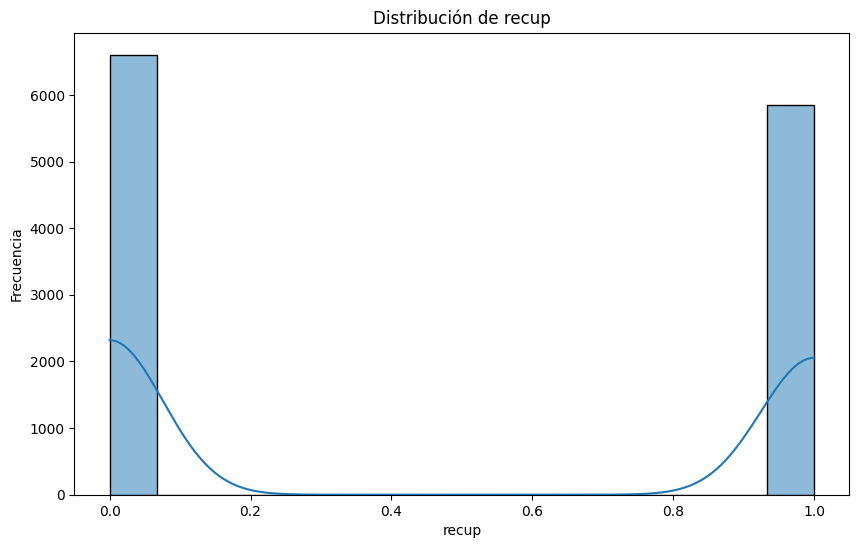

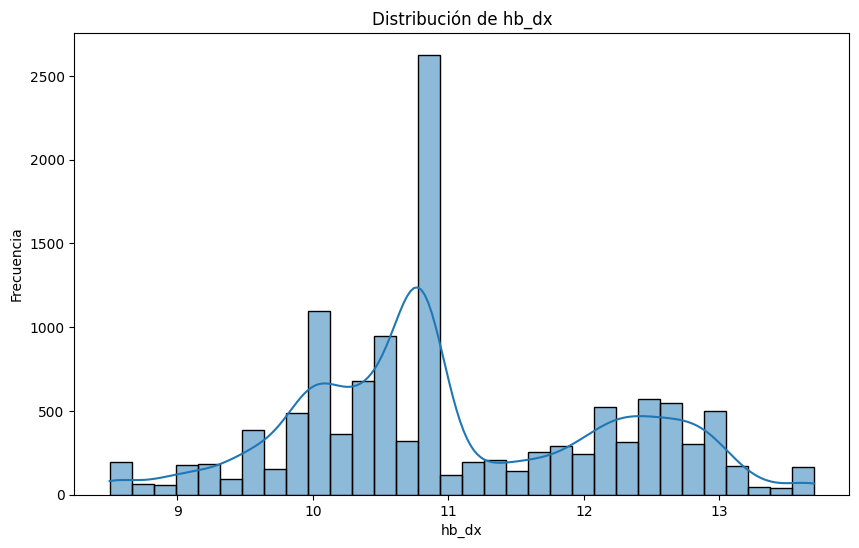

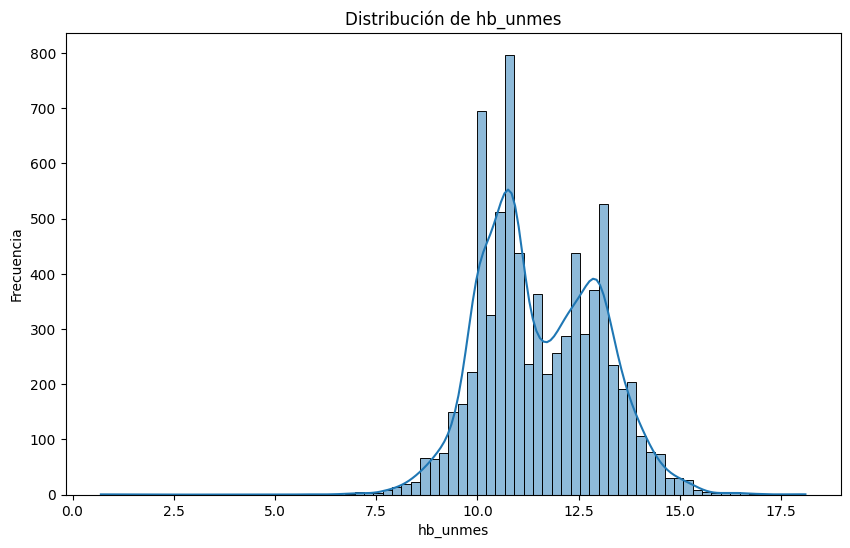

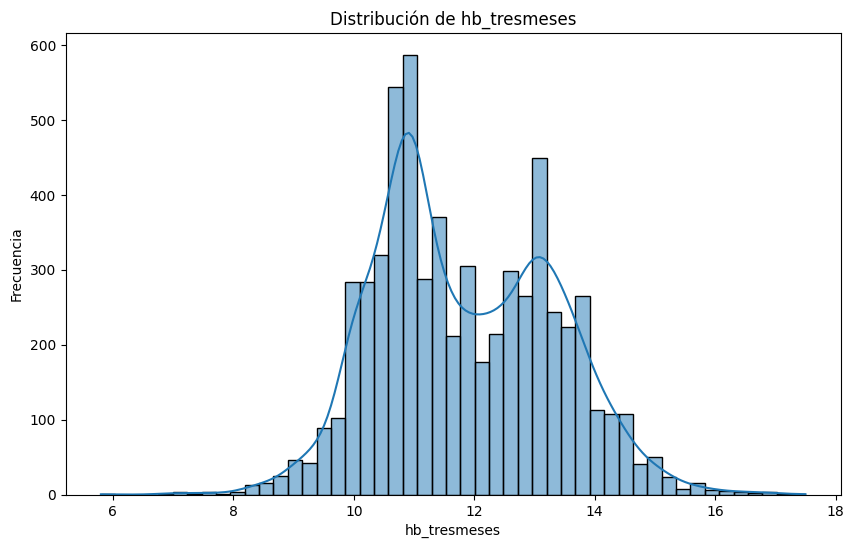

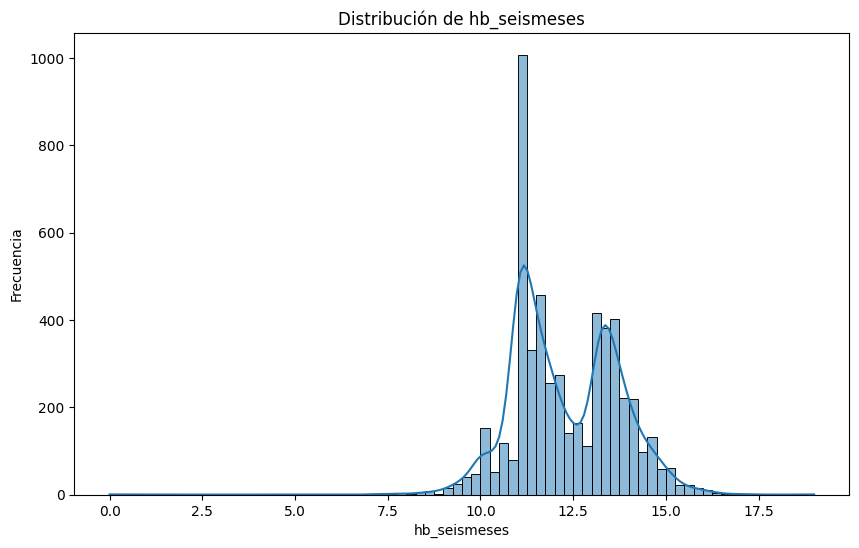

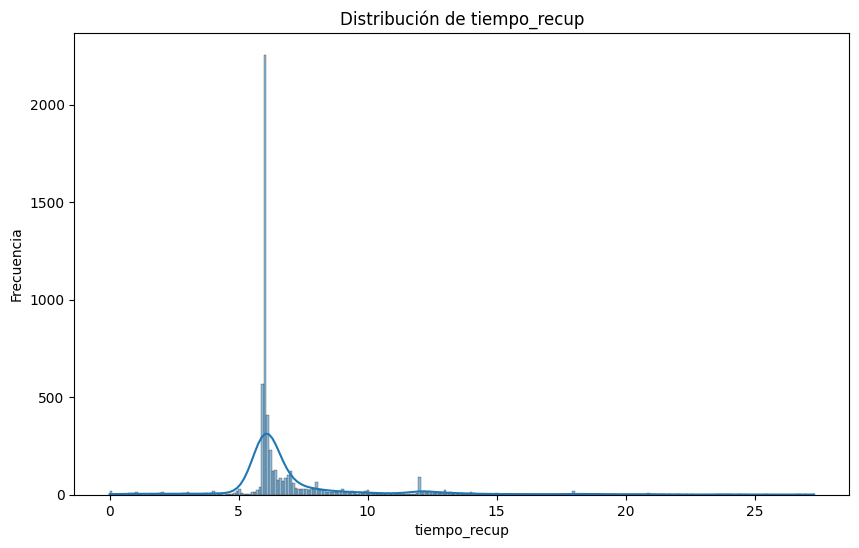

In [26]:
# Lista de variables numéricas clave
numerical_vars = ['valor_lab_dx','recup','hb_dx', 'hb_unmes', 'hb_tresmeses', 'hb_seismeses', 'tiempo_recup']

# Crear un gráfico de distribución para cada variable numérica
for var in numerical_vars:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[var].dropna(), kde=True)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()

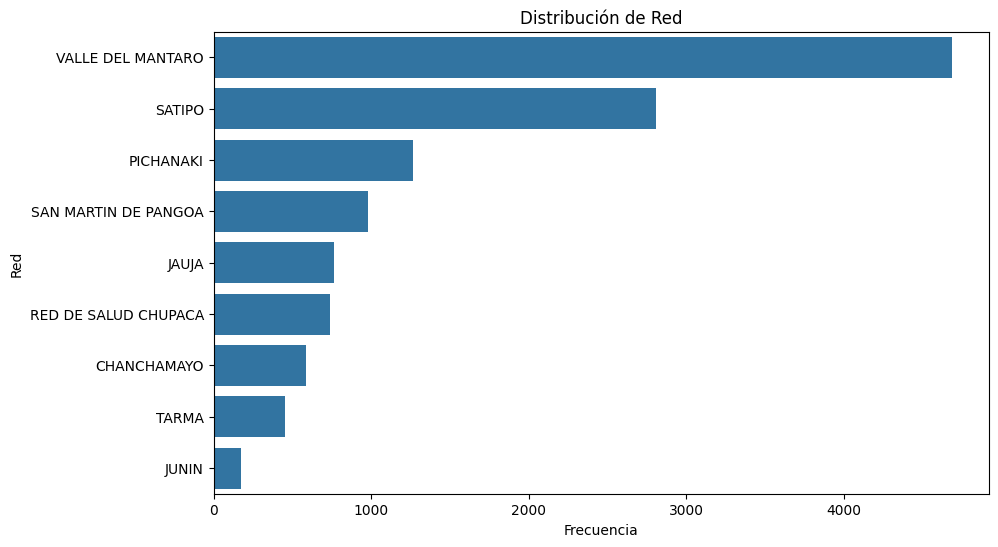

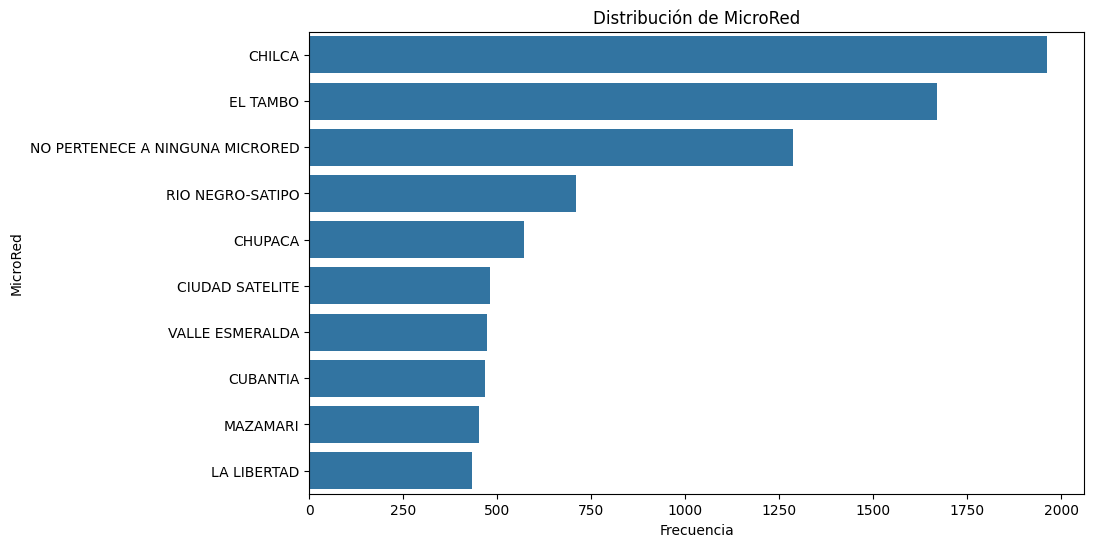

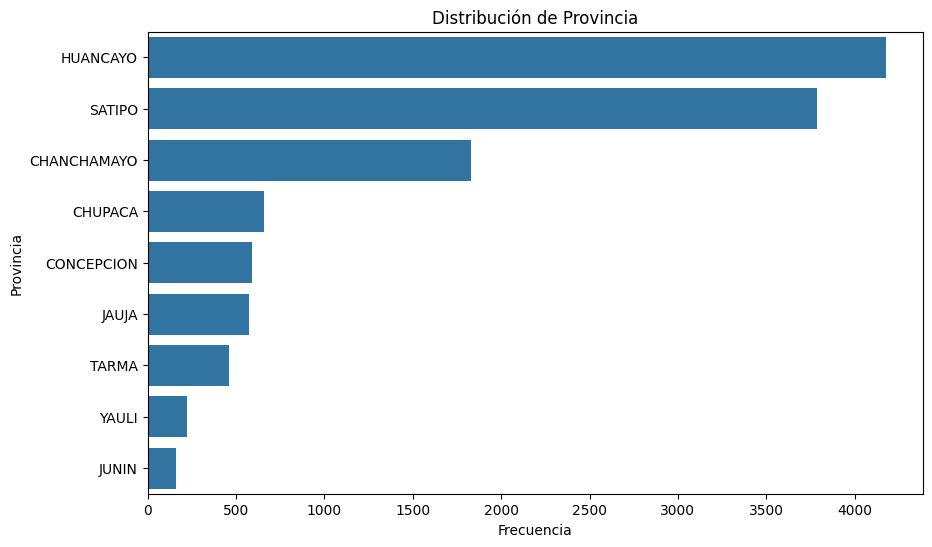

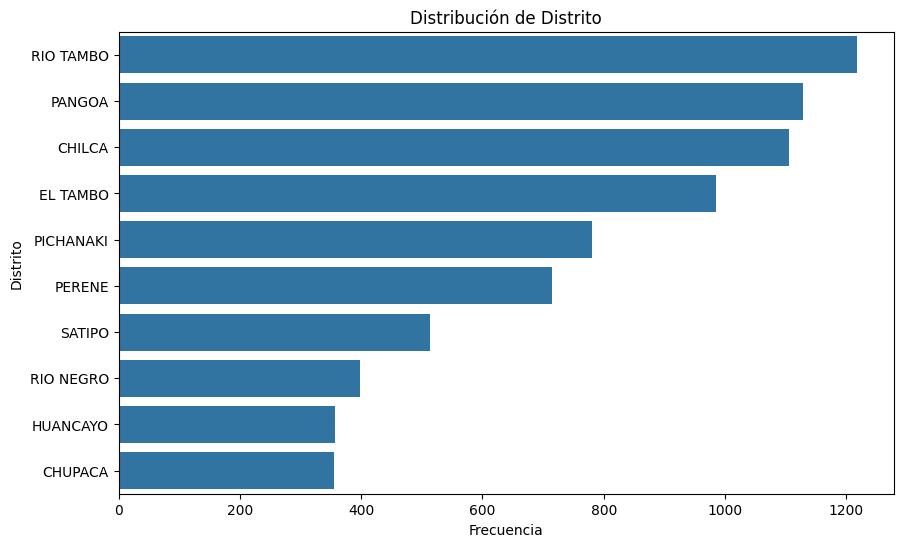

In [18]:
# Lista de variables categóricas clave
categorical_vars = ['Red', 'MicroRed', 'Provincia', 'Distrito']

# Crear un gráfico de conteo para cada variable categórica
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    top_catego = df[var].value_counts().index[:10]
    sns.countplot(y=df[var], order=top_catego)
    plt.title(f'Distribución de {var}')
    plt.xlabel('Frecuencia')
    plt.ylabel(var)
    plt.show()



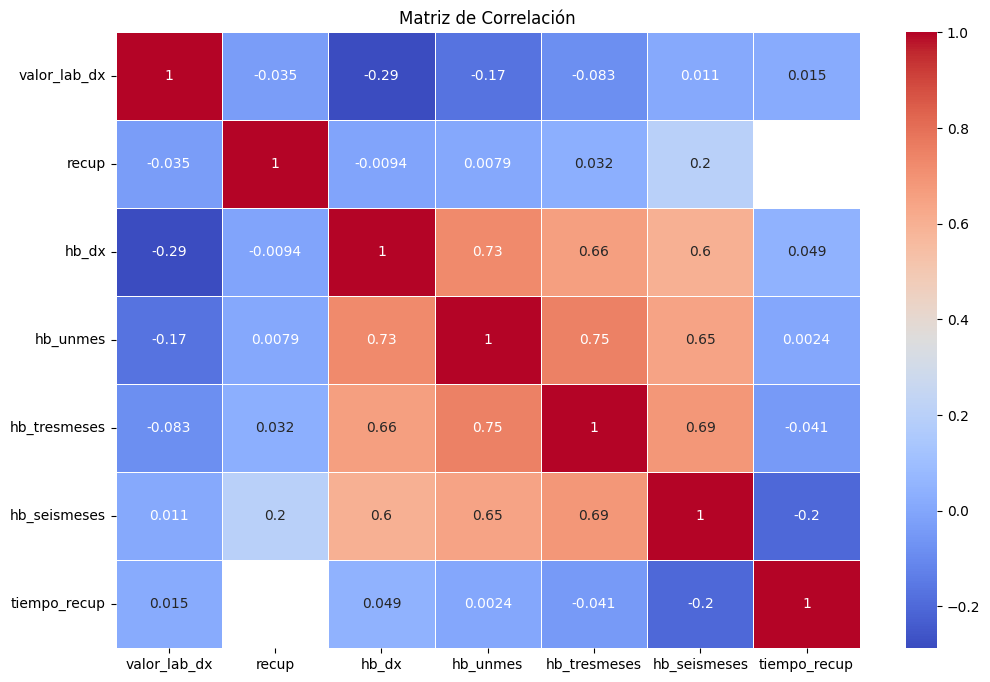

In [27]:
# Mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_vars].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()